In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/winequalityN.csv')
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [ ]:
# If there are any null values in the dataset
for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col]=df[col].fillna(df[col].mean)

df.isnull().sum().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

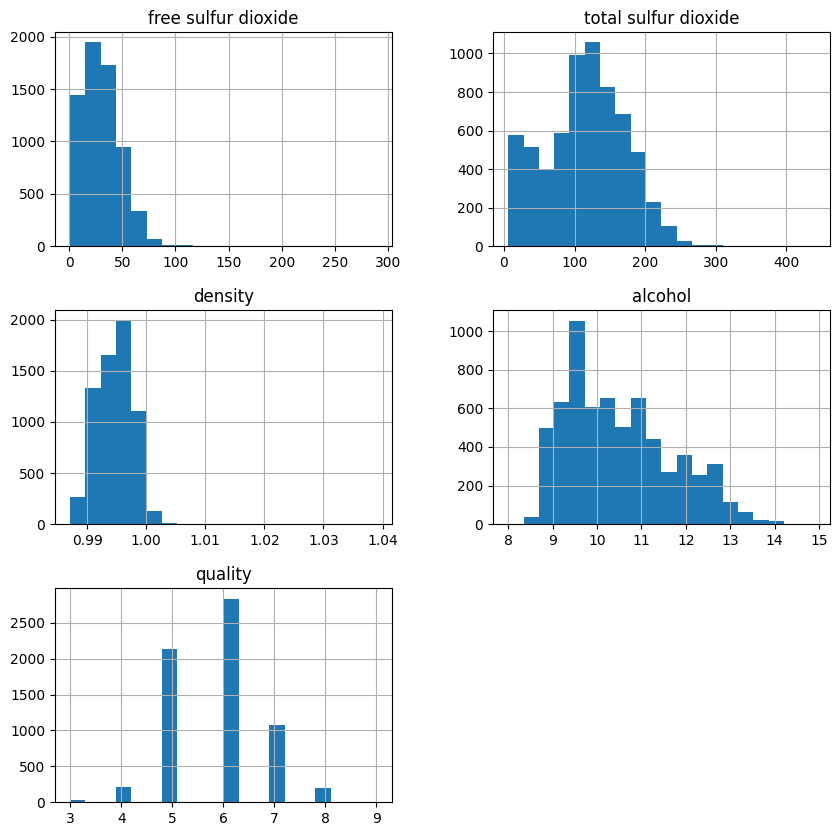

In [ ]:
#histogram
df.hist(bins=20,figsize=(10,10))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

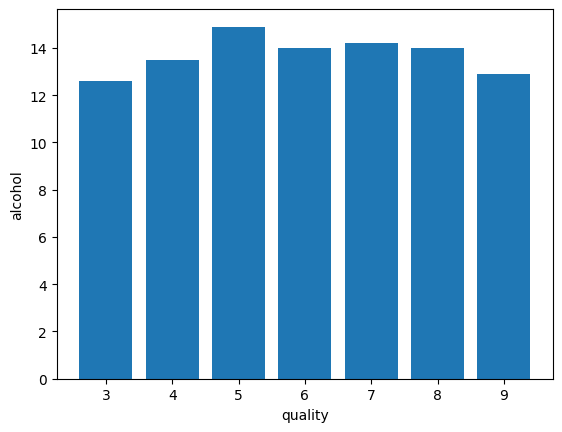

In [ ]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show

In [ ]:
df.corr()

,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
free sulfur dioxide,1.000000,0.720934,0.025717,-0.179838,0.055463
total sulfur dioxide,0.720934,1.000000,0.032395,-0.265740,-0.041385
density,0.025717,0.032395,1.000000,-0.686745,-0.305858
alcohol,-0.179838,-0.265740,-0.686745,1.000000,0.444319
quality,0.055463,-0.041385,-0.305858,0.444319,1.000000


<Axes: >

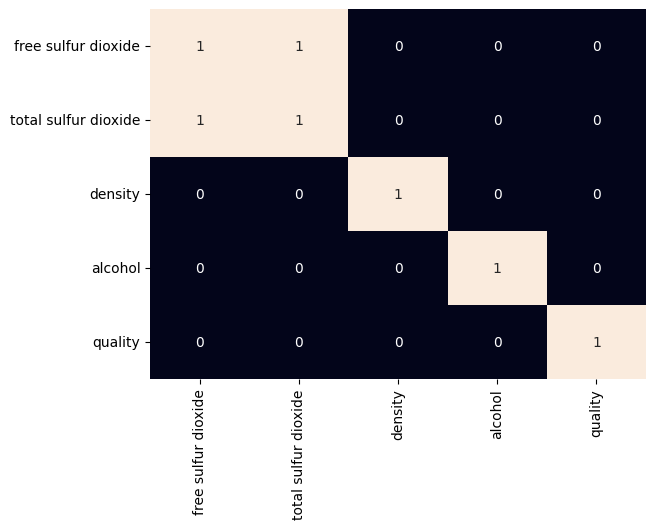

In [ ]:
sb.heatmap(df.corr()>0.7, annot=True, cbar=False)

In [ ]:
#from the plot above, we can see that free sulphur dioxide and total sulphur dioxide are highly correlated
df=df.drop('total sulfur dioxide',axis=1)

In [ ]:
df['Tquality']=[1 if x>5 else 0 for x in df.quality]

In [ ]:
df.replace({'white':0, 'red':1}, inplace=True)

In [ ]:
print(df.head())

   type fixed acidity volatile acidity citric acid residual sugar chlorides  \
0     0           7.0             0.27        0.36           20.7     0.045   
1     0           6.3              0.3        0.34            1.6     0.049   
2     0           8.1             0.28         0.4            6.9      0.05   
3     0           7.2             0.23        0.32            8.5     0.058   
4     0           7.2             0.23        0.32            8.5     0.058   

   free sulfur dioxide  density    pH sulphates  alcohol  quality  Tquality  
0                 45.0   1.0010   3.0      0.45      8.8        6         1  
1                 14.0   0.9940   3.3      0.49      9.5        6         1  
2                 30.0   0.9951  3.26      0.44     10.1        6         1  
3                 47.0   0.9956  3.19       0.4      9.9        6         1  
4                 47.0   0.9956  3.19       0.4      9.9        6         1  


In [ ]:
from sklearn.model_selection import train_test_split
features=df.drop(['quality', 'Tquality'],axis=1)
target=df['Tquality']

Xtrain, Xtest, ytrain, ytest= train_test_split(features, target, test_size=0.2, random_state=400)

Xtrain.shape, Xtest.shape

((5197, 11), (1300, 11))

# New Section

In [ ]:
#normalising
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
Xtrain=norm.fit_transform(Xtrain)
Xtest=norm.transform(Xtest)

TypeError: ignored